### Support Vector Machine Classification

We will build a Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.
- As a rule of thumb, SVMs are great for relatively small data sets with fewer outliers.
- Other algorithms (Random forests, deep neural networks, etc.) require more data but almost always come up with very robust models.
- The decision of which classifier to use depends on your dataset and the general complexity of the problem.
- "Premature optimization is the root of all evil (or at least most of it) in programming." - Donald Knuth, CS Professor (Turing award speech 1974)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Sample Data

# Input Space 'X': [x, y, bias]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

# Output Space 'y': binary -> +1 or -1 
# Easier math compared to 0/1
y = np.array([-1, -1, 1, 1, 1])

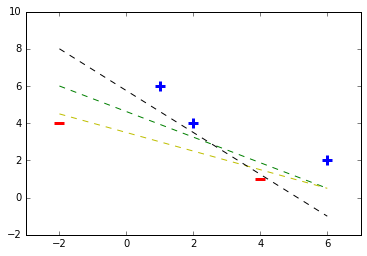

In [3]:
# Plot of both classes, through which we want to draw a hyper-plane
for index, point in enumerate(X):
    if index < 2:
        plt.scatter(point[0], point[1], s=120, marker='_', c='r', linewidths=3)
    else:
        plt.scatter(point[0], point[1], s=120, marker='+', c='b', linewidths=3)

# Naive guess hyper-plane(s)
plt.plot([-2,6],[6,0.5], ls='--', c='g')
plt.plot([-2,6],[4.5,0.5], ls='--', c='y')
plt.plot([-2,6],[8,-1], ls='--', c='black')

### So which hyper-plane should we use?

**Support vectors** are the data points nearest to the hyperplane, the points of a data set that, if removed, would alter the position of the dividing hyperplane. Because of this, they can be considered the critical elements of a data set, they are what help us build our SVM. 

**Maximum margin classification**, i.e. the one which maximizes distance between the plane and the closest data points from each class. We want to maximize the distance to support vectors.
![alt text](https://www.dtreg.com/uploaded/pageimg/SvmMargin2.jpg "Logo Title Text 1")

### How do we find the maximum margin?

#### Hinge Loss function (what to minimize)

![alt text](http://i.imgur.com/OzCwzyN.png "Logo Title Text 1")


c is the loss function, x the sample, y is the true label, f(x) the predicted label.

![alt text](http://i.imgur.com/FZ7JcG3.png "Logo Title Text 1")

 
#### Objective Function (what to optimize)

![alt text](http://i.imgur.com/I5NNu44.png "Logo Title Text 1")

As you can see, our objective of a SVM consists of two terms. The first term is a regularizer, the heart of the SVM, the second term the loss. The regularizer balances between margin maximization and loss. We want to find the decision surface that is maximally far away from any data points.

How do we minimize our loss/optimize for our objective (i.e learn)?

We have to derive our objective function to get the gradients! Gradient descent ftw.  As we have two terms, we will derive them seperately using the sum rule in differentiation.


![alt text](http://i.imgur.com/6uK3BnH.png "Logo Title Text 1")

This means, if we have a misclassified sample, we update the weight vector w using the gradients of both terms, else if classified correctly,we just update w by the gradient of the regularizer.



Misclassification condition 
![alt text](http://i.imgur.com/g9QLAyn.png "Logo Title Text 1")

Update rule for our weights (misclassified)
![alt text](http://i.imgur.com/rkdPpTZ.png "Logo Title Text 1")

including the learning rate η and the regularizer λ
The learning rate is the length of the steps the algorithm makes down the gradient on the error curve.
- Learning rate too high? The algorithm might overshoot the optimal point.
- Learning rate too low? Could take too long to converge. Or never converge.

The regularizer controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. As a regulizing parameter we choose 1/epochs, so this parameter will decrease, as the number of epochs increases.
- Regularizer too high? overfit (large testing error) 
- Regularizer too low? underfit (large training error) 

Update rule for our weights (correctly classified)

![alt text](http://i.imgur.com/xTKbvZ6.png "Logo Title Text 1")


In [4]:
# Stochastic gradient descent optimization
def svm_optimize(X, y):
    # Weights to solve for
    w = np.zeros(len(X[0]))
    # Learning rate
    eta = 1
    # Training iterations
    iters = 100000
    # Misclassification log
    errs = []
    
    for it in range(1, iters):
        err = 0
        lam = 1.0/it
        for i, x in enumerate(X):
            # Misclassification
            if (y[i]*np.dot(X[i], w) < 1):
                # Update using regularizer and loss function 
                w = w + eta * ((X[i] * y[i]) + (-2  * lam * w))
                err = 1
            else:
                # Correct classification update using just regularizer
                w = w + eta * (-2  * lam * w)
        errs.append(err)
        
    # Plot errors in SVM training
    plt.plot(errs, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Iteration')
    plt.ylabel('Misclassified')
    plt.show()
    return w

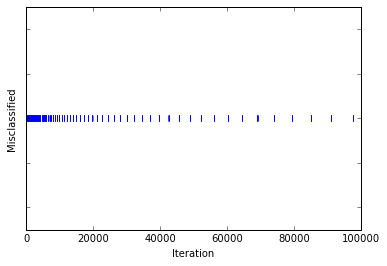

Weights: [  1.58876117   3.17458055  11.11863105]


In [5]:
w = svm_optimize(X, y)
print "Weights:", w

**Misclassifications decrease w/ further iterations!**

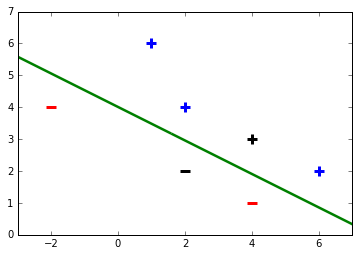

In [6]:
for index, point in enumerate(X):
    if index < 2:
        plt.scatter(point[0], point[1], s=120, marker='_', c='r', linewidths=3)
    else:
        plt.scatter(point[0], point[1], s=120, marker='+', c='b', linewidths=3)

# Add test samples 
plt.scatter(2,2, s=120, marker='_', linewidths=3, color='black')
plt.scatter(4,3, s=120, marker='+', linewidths=3, color='black')

# Print the hyperplane calculated by svm_sgd()
x2= [w[0],w[1],-w[1],w[0]]
x3= [w[0],w[1],w[1],-w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='g')